c:\users\sanan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


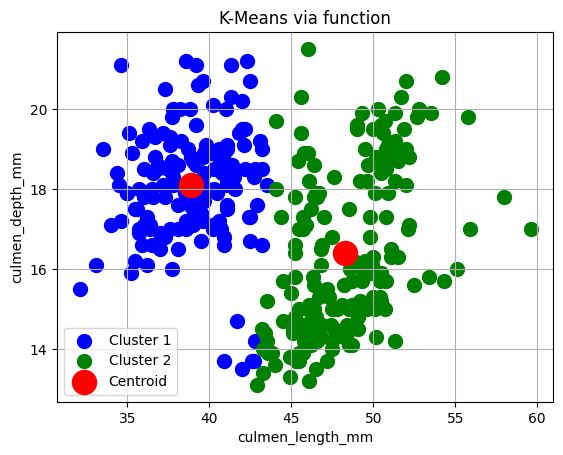

In [4]:
# K MEANS WITH INBUILT

# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading from the dataset
data=pd.read_csv(r"C:\Users\sanan\Downloads\archive (3)\penguins.csv")

'''
# Plotting the points
fig = plt.figure(0)
plt.grid(True)
plt.scatter(data['culmen_length_mm'], data['culmen_depth_mm'])
plt.xlabel("culmen_length_mm")
plt.ylabel("culmen_depth_mm")
plt.show()
'''

# Implementing KMeans using the inbuilt function.
from sklearn.cluster import KMeans
data=data.dropna()
x = data.iloc[:, [0, 1]].values
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 20)  
y_predict= kmeans.fit_predict(x)
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') 
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroid')
plt.title("K-Means via function")
plt.xlabel("culmen_length_mm")
plt.ylabel("culmen_depth_mm")
plt.legend()
plt.grid()
plt.show()


In [5]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


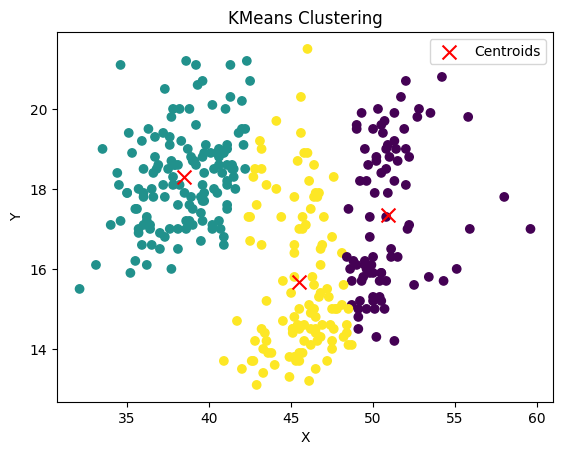

In [11]:
# K MEANS WITH ALGORITHM

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Initialize centroids randomly
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = np.argmin(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2), axis=1)

            # Update centroids based on mean of points in each cluster
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # If centroids have not changed significantly, stop
            if np.all(centroids == new_centroids):
                break

            centroids = new_centroids

        self.centroids = centroids
        self.labels = labels

    def predict(self, X):
        return np.argmin(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2), axis=1)

# Reading from the dataset
data=pd.read_csv(r"C:\Users\sanan\Downloads\archive (3)\penguins.csv")
data=data.dropna()

# Example usage:
X = data.iloc[:, [0, 1]].values

# Initializing and fitting KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', c='red', s=100, label='Centroids')
plt.legend()
plt.title('KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

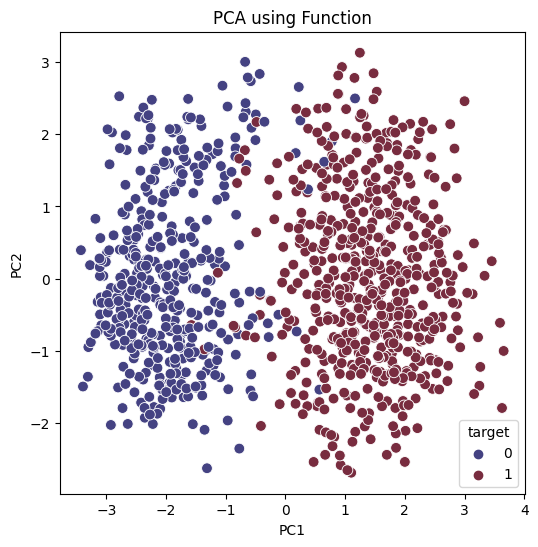

In [13]:
# PCA WITH INBUILT

#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sb
import matplotlib.pyplot as plt

#Load a sample datase
df=pd.read_csv(r"C:\Users\sanan\Downloads\Cardiovascular_Disease_Dataset.csv")

#Extract features (X) and target variable
x = df.iloc[:, 0:14]  #dataset has 14 columns
target = df['target']

#Standardize the data
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

#Apply PCA
pca = PCA(n_components=2)
mat_reduced = pca.fit_transform(x_std)

#Create a DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced, columns=['PC1', 'PC2'])

#Concatenate with the target variable to create a complete Dataset
principal_df = pd.concat([principal_df, pd.DataFrame(target, columns=['target'])], axis=1)

#Plot the scatter plot
plt.figure(figsize=(6, 6))
sb.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60, palette='icefire')
plt.title('PCA using Function')
plt.show()


In [14]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


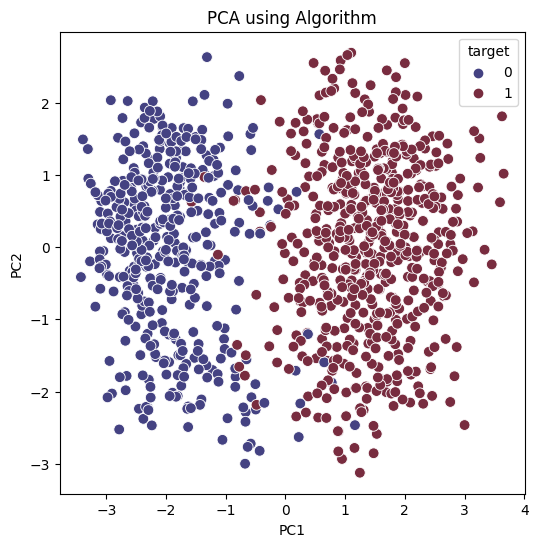

In [15]:
# PCA WITH ALGORITHM

#Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#Load the dataset
df=pd.read_csv(r"C:\Users\sanan\Downloads\Cardiovascular_Disease_Dataset.csv")

#Define the PCA function
def PCA(X, num_components):
    # Step-1=Normalizatin
    X_meaned = X - np.mean(X, axis=0)
    X_std = X_meaned / np.std(X_meaned, axis=0)
    
    # Step-2=Forming the matrix
    cov_mat = np.cov(X_std, rowvar=False)
    
    # Step-3=Finding the eigen values and eigen vectors
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    
    # Step-4=Sorting the matrix
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    
    # Step-5=Storing as a new matrix
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    
    # Step-6=Final Matrix to apply PCA upon
    X_reduced = np.dot(eigenvector_subset.transpose(), X_std.transpose()).transpose()
    return X_reduced

#Extract features (X) and target variable
x = df.iloc[:, 0:14]
target = df['target']

#Apply PCA
mat_reduced = PCA(x, 2)

#Create a DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced, columns=['PC1', 'PC2'])

#Concatenate with the target variable to create a complete Dataset
principal_df = pd.concat([principal_df, pd.DataFrame(target)], axis=1)

#Plot the scatter plot
plt.figure(figsize=(6, 6))
sb.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60, palette='icefire')
plt.title('PCA using Algorithm')
plt.show()


In [18]:
# PCA WITH ALGORITHM

import numpy as np

class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        # Compute covariance matrix
        covariance_matrix = np.cov(X.T)

        # Compute eigenvectors and eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort eigenvectors based on eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[idxs]

        # Select top n_components eigenvectors
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # Project data onto principal components
        return np.dot(X, self.components.T)


# Example usage:
# Generating random data
np.random.seed(0)
X = np.random.randn(100, 20)

# Initializing and fitting CustomPCA
pca = CustomPCA(n_components=1)
pca.fit(X)

# Transforming data
X_transformed = pca.transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_transformed.shape)

Original shape: (100, 20)
Transformed shape: (100, 1)


In [23]:
# NAIVE BAYES WITH ALGORITHM

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\sanan\Downloads\Cardiovascular_Disease_Dataset.csv")

# Assuming that 'target' is the column you want to predict
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.81

Confusion Matrix:
 [[ 56  27]
 [ 11 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75        83
           1       0.80      0.91      0.85       117

    accuracy                           0.81       200
   macro avg       0.82      0.79      0.80       200
weighted avg       0.81      0.81      0.81       200



In [24]:
# Creating new dataframe for only required columns
cols=["age", "target"]
df_new=df[cols]
df_new

# Check for Null
df_new.isnull().sum()

# Finding range of age
df_new.age.min()
df_new.age.max()

# Categorizing the ages by binning
df_new["Age_category"]=pd.cut(df_new.age,bins=[19,25,50,81],labels=["Youth","Mid-Age","Old-Age"])

# Changing the Data Type as "Category"
df_new.target=df_new.target.astype("category")
df_new.info()

# Applying coding to data
df_new["Coding"]=df_new.target.cat.codes
df_new

# Creating a new dataframe based off Age_category and target details
df1=pd.DataFrame(pd.pivot_table(df_new,columns="target",index="Age_category",values="Coding",aggfunc="count"))
df1

# Preparing data with probabilities
n=df_new["target"].count()
df2=df1.append(df1.sum()/n,ignore_index=True)
df2["P"]=df2.sum(axis=1)/n
df2

#P(Yes/Youth)
Yes_Youth=((df2[1][0]/df1[1].sum())*df2[1][3])/df2["P"][0]
Yes_Youth

#P(No/Youth)
No_Youth=((df2[0][0]/df1[0].sum())*df2[0][3])/df2["P"][0]
No_Youth

# Naive Bayes result for a person in the youth age category
print("Given the age is Youth category")
if(Yes_Youth>No_Youth):
    print("The person likely has CardioVascular Disease")
else:
    print("The person likely does not have CardioVascular Disease")


#P(Yes/Mid-Age)
Yes_Mid_Age=((df2[1][1]/df1[1].sum())*df2[1][3])/df2["P"][1]
Yes_Mid_Age

#P(No/Mid-Age)
No_Mid_Age=((df2[0][1]/df1[0].sum())*df2[0][3])/df2["P"][1]
No_Mid_Age

# Naive Bayes result for a person in the mid-age age category
print("Given the age is Mid-Age category")
if(Yes_Mid_Age>No_Mid_Age):
    print("The person likely has CardioVascular Disease")
else:
    print("The person likely does not have CardioVascular Disease")

#P(Yes/Old-Age)
Yes_Old_Age=((df2[1][2]/df1[1].sum())*df2[1][3])/df2["P"][2]
Yes_Old_Age

#P(No/Old-Age)
No_Old_Age=((df2[0][2]/df1[0].sum())*df2[0][3])/df2[0][2]
No_Old_Age

# Naive Bayes result for a person in the old-age age category
print("Given the age is Old-Age category")
if(Yes_Old_Age>No_Old_Age):
    print("The person likely has CardioVascular Disease")
else:
    print("The person likely does not have CardioVascular Disease")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1000 non-null   int64   
 1   target        1000 non-null   category
 2   Age_category  1000 non-null   category
dtypes: category(2), int64(1)
memory usage: 10.1 KB
Given the age is Youth category
The person likely does not have CardioVascular Disease
Given the age is Mid-Age category
The person likely has CardioVascular Disease
Given the age is Old-Age category
The person likely has CardioVascular Disease


C:\Users\sanan\AppData\Local\Temp\ipykernel_19536\1486190566.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Age_category"]=pd.cut(df_new.age,bins=[19,25,50,81],labels=["Youth","Mid-Age","Old-Age"])
C:\Users\sanan\AppData\Local\Temp\ipykernel_19536\1486190566.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.target=df_new.target.astype("category")
C:\Users\sanan\AppData\Local\Temp\ipykernel_19536\1486190566.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Accuracy: 0.7611940298507462


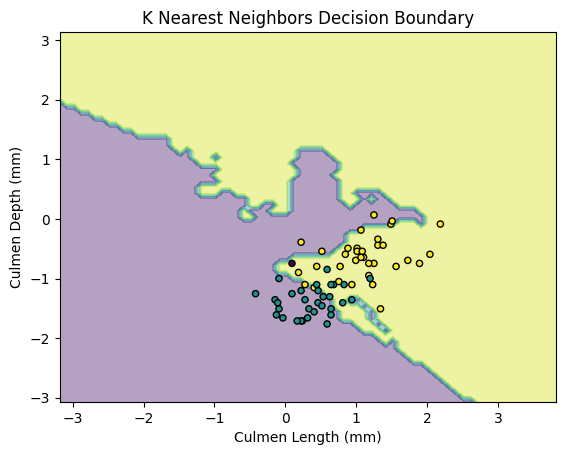

In [32]:
# KNN WITH ALGORITHM

from sklearn.preprocessing import LabelEncoder

# Load the penguins dataset
data = pd.read_csv(r"C:\Users\sanan\Downloads\archive (3)\penguins.csv")

# Drop rows with missing values
data = data.dropna()

# Select features and target
X = data[['culmen_length_mm', 'culmen_depth_mm']].values
y = data['sex'].values

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the data into train and test sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_encoded[:split_index], y_encoded[split_index:]

# Initialize and fit KNN model
k = 5
knn = KNN(k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.title('K Nearest Neighbors Decision Boundary')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()



Results for Decision Tree[Using the GINI Algorithm to find Optimal Threshold Value]:
Accuracy: 0.96

Confusion Matrix:
 [[ 78   5]
 [  3 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       0.96      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



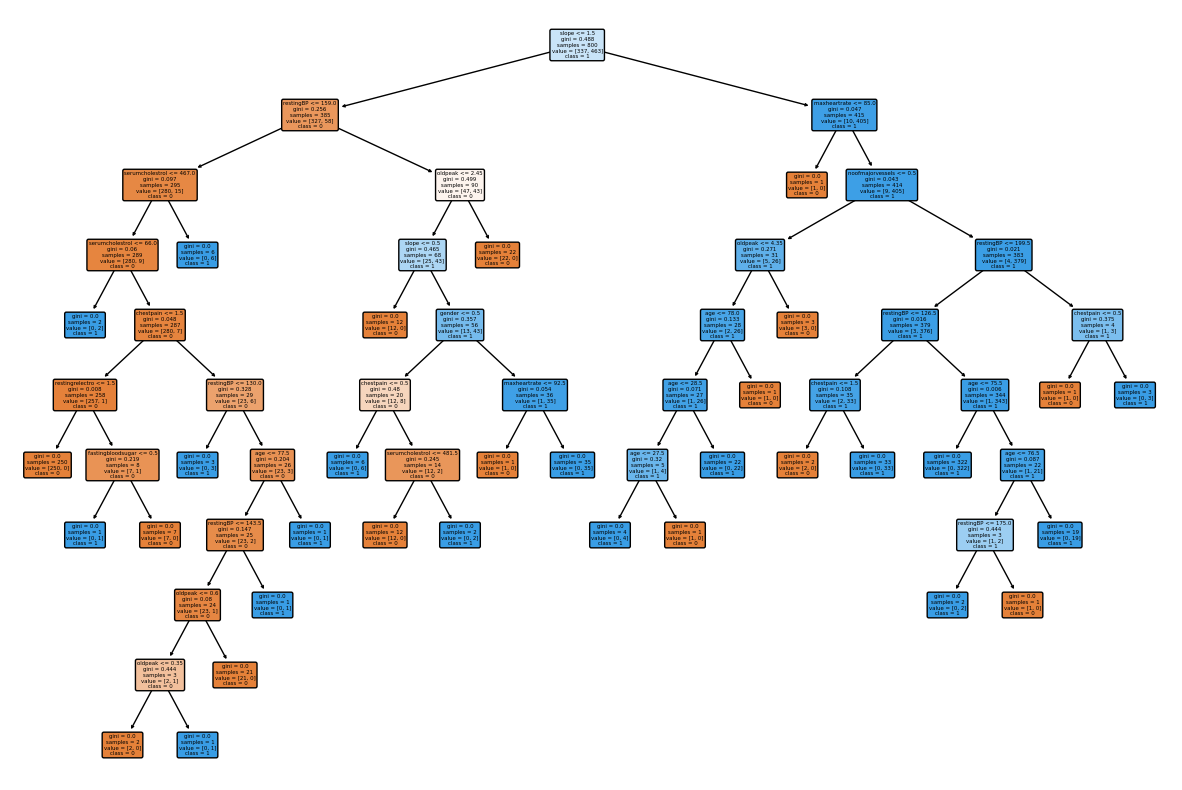

In [35]:
# DECISION TREE USING INBUILT

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\sanan\Downloads\Cardiovascular_Disease_Dataset.csv")

# Predicting for "target" column
X = df.drop('target', axis=1) 
y = df['target']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='gini',random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the performance of Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results for Decision Tree
print("\nResults for Decision Tree[Using the GINI Algorithm to find Optimal Threshold Value]:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", classification_rep_dt)

# Define the plot_decision_tree function
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

# Plot the Decision Tree
feature_names = X.columns
class_names = [str(class_label) for class_label in dt_classifier.classes_]
plot_decision_tree(dt_classifier, feature_names, class_names)


Accuracy: 0.94

Confusion Matrix:
 [[ 78   5]
 [  6 111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93        83
           1       0.96      0.95      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



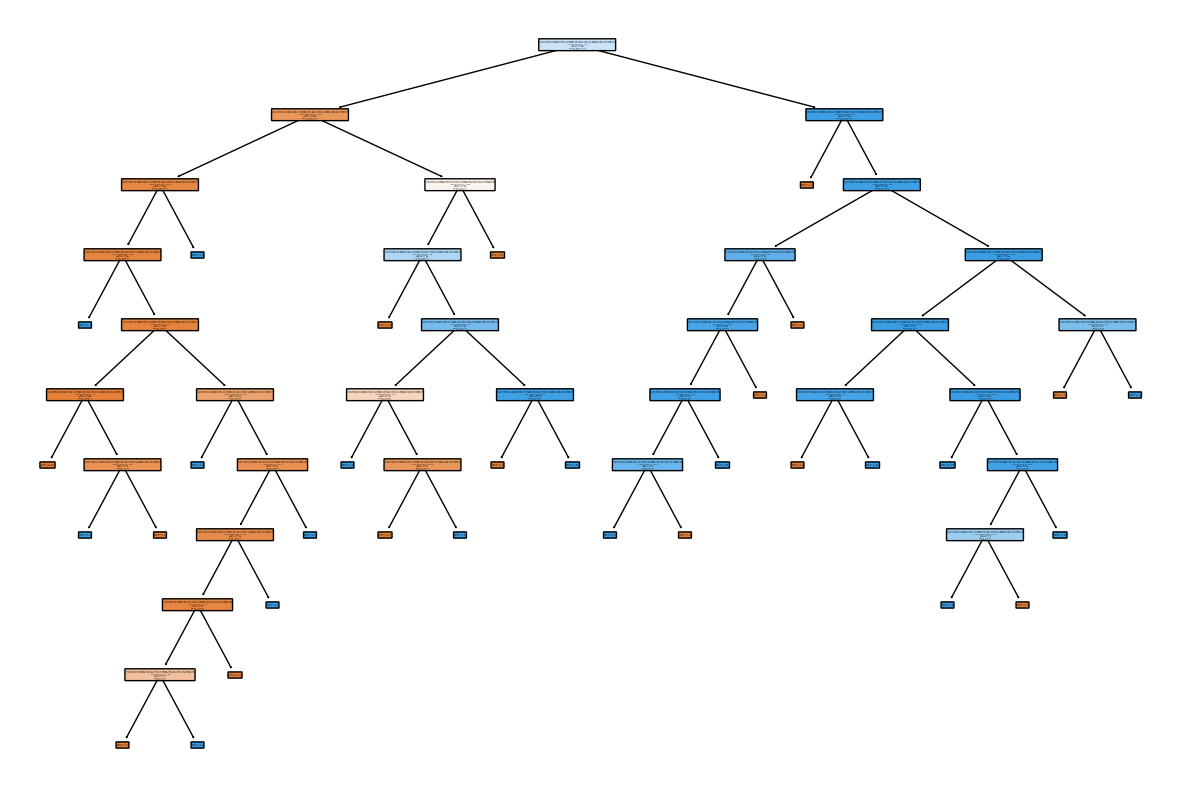

In [36]:
# DECISION TREE USING ALGORITHM

# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Building tree structure
class TreeNode:
    def __init__(self, data, depth=0, max_depth=None):
        self.data = data
        self.depth = depth
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.target_value = None

# Optimal Threshold Value of separation done via gini impurity
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities**2)

def split_data(X, y, feature_index, threshold):
    mask = X[:, feature_index] <= threshold
    return X[mask], X[~mask], y[mask], y[~mask]

def find_best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None, None

    num_classes = len(np.unique(y))
    if num_classes == 1:
        return None, None

    base_impurity = gini_impurity(y)

    best_impurity = 1
    best_feature_index = None
    best_threshold = None

    for feature_index in range(n):
        thresholds = np.unique(X[:, feature_index])

        for threshold in thresholds:
            X_left, X_right, y_left, y_right = split_data(X, y, feature_index, threshold)

            if len(y_left) == 0 or len(y_right) == 0:
                continue

            impurity = (len(y_left) / m) * gini_impurity(y_left) + (len(y_right) / m) * gini_impurity(y_right)

            if impurity < best_impurity:
                best_impurity = impurity
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold

# Using split algorithm, implementing the nodes of the tree and linking them
def build_tree(X, y, depth=0, max_depth=None):
    num_samples, num_features = X.shape
    unique_classes, counts = np.unique(y, return_counts=True)
    predicted_class = unique_classes[np.argmax(counts)]

    node = TreeNode(data=(X, y), depth=depth, max_depth=max_depth)
    node.target_value = predicted_class

    if depth < max_depth:
        feature_index, threshold = find_best_split(X, y)

        if feature_index is not None:
            X_left, X_right, y_left, y_right = split_data(X, y, feature_index, threshold)

            node.feature_index = feature_index
            node.threshold = threshold
            node.left = build_tree(X_left, y_left, depth + 1, max_depth)
            node.right = build_tree(X_right, y_right, depth + 1, max_depth)

    return node

# Predicting the tree values
def predict_tree(node, X):
    if node.left is None and node.right is None:
        return node.target_value

    if X[node.feature_index] <= node.threshold:
        return predict_tree(node.left, X)
    else:
        return predict_tree(node.right, X)

# Load the dataset
df = pd.read_csv(r"C:\Users\sanan\Downloads\Cardiovascular_Disease_Dataset.csv")

# Predicting for 'Target' column
X = df.drop('target', axis=1).values 
y = df['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree
max_depth = 3
tree = build_tree(X_train, y_train, max_depth=max_depth)

# Make predictions on the test set
y_pred = [predict_tree(tree, x) for x in X_test]

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Define the plot_decision_tree function
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

# Plot the Decision Tree
feature_names = X
class_names = [str(class_label) for class_label in dt_classifier.classes_]
plot_decision_tree(dt_classifier, feature_names, class_names)


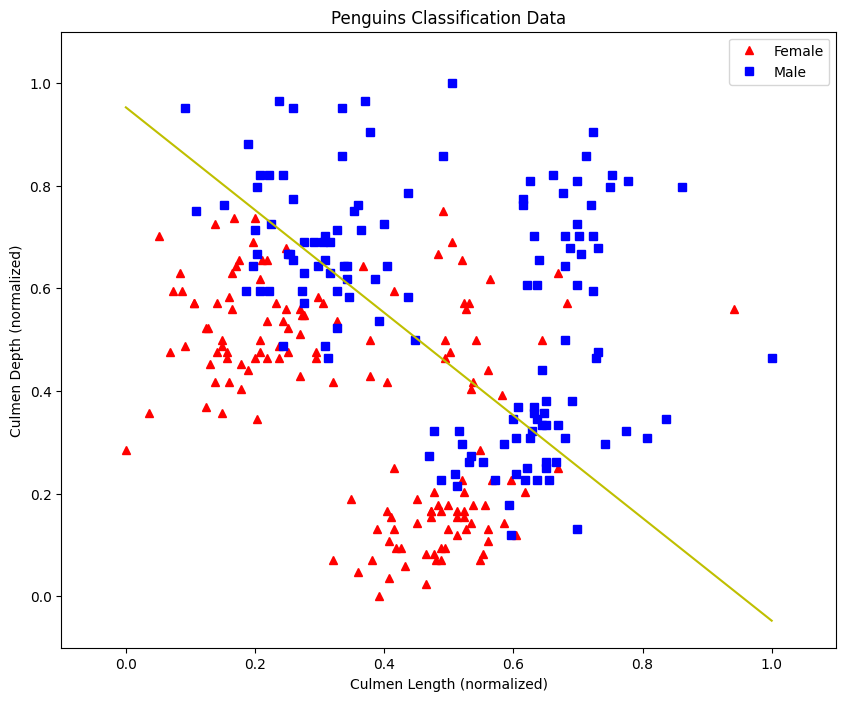

Accuracy: 65.22%


In [38]:
# PERCEPTRON WITH ALGORITHM

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def perceptron(X, y, learning_rate, epochs):
    # Add a bias term to X
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize weights to zeros
    theta = np.zeros(X.shape[1])

    # Placeholder for misclassifications and loss
    miss_list = []
    loss_list = []

    for epoch in range(epochs):
        miss_count = 0
        for i in range(X.shape[0]):
            if y[i] * np.dot(theta, X[i, :]) <= 0:
                theta += learning_rate * y[i] * X[i, :]
                miss_count += 1
        
        # Calculate the loss (misclassification ratio)
        loss = miss_count / X.shape[0]
        miss_list.append(miss_count)
        loss_list.append(loss)

    return theta, miss_list, loss_list

# Load the penguins dataset
dd = pd.read_csv(r"C:\Users\sanan\Downloads\archive (3)\penguins.csv")
dd['target'] = np.where(dd['sex'] == 'MALE', 1, -1)
X = dd[['culmen_length_mm', 'culmen_depth_mm']].values
y = dd['target'].values
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The  plot_decision_boundary function
def plot_decision_boundary(X, y, theta):
    x1 = np.array([min(X[:, 0]), max(X[:, 0])])
    x2 = -(theta[0] + theta[1] * x1) / theta[1]

    fig = plt.figure(figsize=(10, 8))

    # Filter data based on non-missing indices
    not_missing_indices = ~np.isnan(X).any(axis=1)

    plt.plot(X[not_missing_indices, 0][y[not_missing_indices] == -1], X[not_missing_indices, 1][y[not_missing_indices] == -1], "r^", label='Female')
    plt.plot(X[not_missing_indices, 0][y[not_missing_indices] == 1], X[not_missing_indices, 1][y[not_missing_indices] == 1], "bs", label='Male')

    plt.xlabel("Culmen Length (normalized)")
    plt.ylabel("Culmen Depth (normalized)")
    plt.title('Penguins Classification Data')
    plt.plot(x1, x2, 'y-')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.legend()

# Perceptron training
theta, miss_list, loss_list = perceptron(X_train, y_train, learning_rate=0.2, epochs=10)

# Plotting the decision boundary
plot_decision_boundary(X_train, y_train, theta)
plt.show()

def predict(X, theta):
    # Add a bias term to X
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Ensure the correct dimensions of theta
    if len(theta) != X_bias.shape[1]:
        raise ValueError(f"Invalid dimensions of theta. Expected {X_bias.shape[1]} elements, got {len(theta)}.")

    # Calculate predictions using the perceptron model
    predictions = np.sign(np.dot(X_bias, theta))
    
    return predictions

# Use the trained perceptron to make predictions on the test set
y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


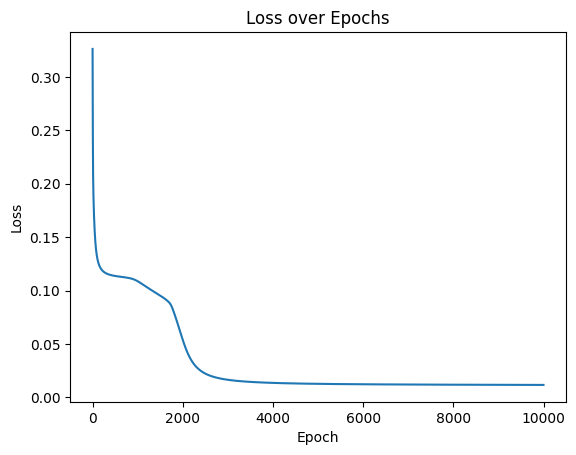

Accuracy: 97.78%


In [39]:
# NEURAL NETWORK FROM SCRATCH

# Import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Defining the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initializing random weights for initial pass
def initialize_weights(layers):
    weights = [2 * np.random.rand(layers[i+1], layers[i]) - 1 for i in range(len(layers) - 1)]
    biases = [np.random.rand(layers[i+1], 1) for i in range(len(layers) - 1)]
    return weights, biases

# Implementation of forward propagation
def forward_propagation(inputs, weights, biases):
    activations = [inputs]
    for i in range(len(weights)):
        z = np.dot(weights[i], activations[-1]) + biases[i]
        a = sigmoid(z)
        activations.append(a)
    return activations

# Implementation of backward propagation and usage of gradient descent
def backward_propagation(inputs, outputs, weights, biases, activations, learning_rate=0.01):
    errors = [outputs - activations[-1]]
    deltas = [errors[-1] * sigmoid_derivative(activations[-1])]
    
    for i in range(len(weights)-1, 0, -1):
        errors.append(np.dot(weights[i].T, deltas[-1]))
        deltas.append(errors[-1] * sigmoid_derivative(activations[i]))
    
    for i in range(len(weights)-1, -1, -1):
        weights[i] += learning_rate * np.dot(deltas[len(weights)-1-i], activations[i].T)
        biases[i] += learning_rate * deltas[len(weights)-1-i]

# Training-Test for the Neural Network        
def train_and_evaluate_neural_network(X_train, Y_train, X_test, Y_test, layers, epochs=10000, learning_rate=0.01):
    weights, biases = initialize_weights(layers)
    losses = []

    for epoch in range(epochs):
        for i in range(X_train.shape[0]):
            inputs = X_train[i].reshape(-1, 1)
            outputs = Y_train[i].reshape(-1, 1)
            activations = forward_propagation(inputs, weights, biases)
            backward_propagation(inputs, outputs, weights, biases, activations, learning_rate)

        # Calculate the loss
        predictions = forward_propagation(X_train.T, weights, biases)[-1]
        loss = np.mean((predictions - Y_train.T)**2)
        losses.append(loss)

    # Forward pass
    test_predictions = forward_propagation(X_test.T, weights, biases)[-1]
    
    # Calculate accuracy
    accuracy = np.mean((test_predictions >= 0.5).astype(int) == Y_test.T)
    
    return weights, biases, losses, accuracy

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Encode the output classes
num_classes = 3
Y_encoded = np.eye(num_classes)[y]

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Define neural network architecture
input_size = X_train.shape[1]
output_size = num_classes
hidden_layer_size = 4
layers = [input_size, hidden_layer_size, output_size]

# Train and evaluate the neural network
trained_weights, trained_biases, losses, accuracy = train_and_evaluate_neural_network(X_train, Y_train, X_test, Y_test, layers)

# Plot the loss over epochs
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Display accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


In [40]:
# BASIC NEURAL NETWORK

# Import required Libraries
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize all weights to Zero
def initialize_weights(n_features):
    return np.zeros(n_features), 0

# Update the weights for each iteration
def update_weights(X, Y, W, b, learning_rate):
    m = len(Y)
    Y_pred = predict(X, W, b)
    dW = (-2 * (X.T).dot(Y - Y_pred)) / m
    db = -2 * np.sum(Y - Y_pred) / m
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b

# Make predictions
def predict(X, W, b):
    return X.dot(W) + b

# Fit the model to linear Regression
def linear_regression_fit(X_train, Y_train, iterations, learning_rate):
    W, b = initialize_weights(X_train.shape[1])
    for _ in range(iterations):
        W, b = update_weights(X_train, Y_train, W, b, learning_rate)
    return W, b


# Load California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
Y = california_housing.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Model training without regularization
iterations = 1000
learning_rate = 0.01
W, b = linear_regression_fit(X_train, Y_train, iterations, learning_rate)

# Prediction on test set
Y_pred = predict(X_test, W, b)

# Print results
print("Predicted values:", np.round(Y_pred[:3], 2))
print("Real values:", Y_test[:3])
print("Trained W:", W)
print("Trained b:", b)


Predicted values: [2.23 2.83 1.98]
Real values: [1.369 2.413 2.007]
Trained W: [ 8.56118727e-01  1.43486807e-01 -2.57038562e-01  2.54274905e-01
 -2.28399982e-04 -4.86655748e-02 -6.66525423e-01 -6.39586087e-01]
Trained b: 2.0709833184671735


In [41]:
# BASIC NEURAL NETWORK WITH L1 PENALTY

# Import required Libraries
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize all weights to zero
def initialize_weights(n_features):
    return np.zeros(n_features), 0

# Update weights on each iteration
def update_weights(X, Y, W, b, learning_rate, l1_penalty):
    m = len(Y)
    Y_pred = predict(X, W, b)
    dW = (-2 * (X.T).dot(Y - Y_pred) + l1_penalty * np.sign(W)) / m
    db = -2 * np.sum(Y - Y_pred) / m
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b

# Make Predictions
def predict(X, W, b):
    return X.dot(W) + b

# Fit the model for the L1 Regularization
def lasso_regression_fit(X_train, Y_train, iterations, learning_rate, l1_penalty):
    W, b = initialize_weights(X_train.shape[1])
    for _ in range(iterations):
        W, b = update_weights(X_train, Y_train, W, b, learning_rate, l1_penalty)
    return W, b


# Load California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
Y = california_housing.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Model training with L1 regularization (Lasso)
iterations = 1000
learning_rate = 0.01
l1_penalty = 1
W, b = lasso_regression_fit(X_train, Y_train, iterations, learning_rate, l1_penalty)

# Prediction on test set
Y_pred = predict(X_test, W, b)

# Print results
print("Predicted values:", np.round(Y_pred[:3], 2))
print("Real values:", Y_test[:3])
print("Trained W:", W)
print("Trained b:", b)


Predicted values: [2.23 2.83 1.98]
Real values: [1.369 2.413 2.007]
Trained W: [ 8.56006798e-01  1.43479705e-01 -2.56755084e-01  2.53987009e-01
 -2.46553423e-04 -4.85888224e-02 -6.66214239e-01 -6.39258105e-01]
Trained b: 2.070982558858516


In [43]:
# BASIC NEURAL NETWORK WITH L2 PENALTY

# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Initialize weights to zero
def initialize_weights(n_features):
    return np.zeros(n_features), 0

# Update weights on each iteration
def update_weights(X, Y, W, b, learning_rate, l2_penalty):
    m = len(Y)
    Y_pred = predict(X, W, b)
    dW = (-2 * (X.T).dot(Y - Y_pred) + 2 * l2_penalty * W) / m
    db = -2 * np.sum(Y - Y_pred) / m
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b

# Make predictions
def predict(X, W, b):
    return X.dot(W) + b

# Fit the model to the L2 regularization
def ridge_regression_fit(X_train, Y_train, iterations, learning_rate, l2_penalty):
    W, b = initialize_weights(X_train.shape[1])
    for _ in range(iterations):
        W, b = update_weights(X_train, Y_train, W, b, learning_rate, l2_penalty)
    return W, b

# Load California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
Y = california_housing.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Model training
iterations = 1000
learning_rate = 0.01
l2_penalty = 1
W, b = ridge_regression_fit(X_train, Y_train, iterations, learning_rate, l2_penalty)

# Prediction on test set
Y_pred = predict(X_test, W, b)

# Print results
print("Predicted values:", np.round(Y_pred[:3], 2))
print("Real values:", Y_test[:3])
print("Trained W:", W)
print("Trained b:", b)


Predicted values: [2.23 2.83 1.98]
Real values: [1.369 2.413 2.007]
Trained W: [ 8.56020356e-01  1.43510769e-01 -2.56851145e-01  2.54085953e-01
 -2.18979044e-04 -4.86643156e-02 -6.66212878e-01 -6.39263654e-01]
Trained b: 2.070982623165817


In [45]:
# BASIC NEURAL NETWORK WITHOUT AUGMENTATION

# Import the required libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [46]:
# BASIC NEURAL NETWORK WITH AUGMENTATION

# Import required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define data augmentation generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=10,
                    validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [47]:
# BASIC NEURAL NETWORK WITHOUT REGULARIZATION

# Import required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
3/3 [==============================] - 3s 115ms/step - loss: 1.1710 - accuracy: 0.2604 - val_loss: 1.1470 - val_accuracy: 0.2500
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0552 - accuracy: 0.4375 - val_loss: 1.0703 - val_accuracy: 0.4167
Epoch 3/100
3/3 [==============================] - 0s 34ms/step - loss: 0.9562 - accuracy: 0.6146 - val_loss: 1.0058 - val_accuracy: 0.4583
Epoch 4/100
3/3 [==============================] - 0s 35ms/step - loss: 0.8826 - accuracy: 0.6562 - val_loss: 0.9481 - val_accuracy: 0.4583
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.8202 - accuracy: 0.6562 - val_loss: 0.8968 - val_accuracy: 0.4583
Epoch 6/100
3/3 [==============================] - 0s 37ms/step - loss: 0.7653 - accuracy: 0.6875 - val_loss: 0.8519 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 41ms/step - loss: 0.7200 - accuracy: 0.7188 - val_loss: 0.8102 - val_accuracy: 0.5833
Epoch 8/100
3/3 [==

In [49]:
# NEURAL NETWORK WITH REGULARIZATION - NOISY DATA

# Import the required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to add random noise to the input features
def add_noise(X, noise_factor=0.1):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=X.shape)
    noisy_X = X + noise
    return noisy_X

# Load the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add noise to the training data
noisy_X = add_noise(X)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(noisy_X, Y, test_size=0.2, random_state=42)

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
3/3 [==============================] - 1s 89ms/step - loss: 1.0879 - accuracy: 0.3438 - val_loss: 1.0987 - val_accuracy: 0.2917
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0236 - accuracy: 0.6562 - val_loss: 1.0307 - val_accuracy: 0.7083
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.9667 - accuracy: 0.7812 - val_loss: 0.9669 - val_accuracy: 0.8333
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.9099 - accuracy: 0.8021 - val_loss: 0.9073 - val_accuracy: 0.8333
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.8545 - accuracy: 0.8438 - val_loss: 0.8498 - val_accuracy: 0.8333
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.8036 - accuracy: 0.8125 - val_loss: 0.7938 - val_accuracy: 0.8333
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.7525 - accuracy: 0.8125 - val_loss: 0.7415 - val_accuracy: 0.8333
Epoch 8/100
3/3 [===

In [50]:
# NEURAL NETWORK WITH REGULARIZATION - EARLY STOPPING

# Import required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# Load the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the architecture of the neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
3/3 [==============================] - 1s 89ms/step - loss: 1.0812 - accuracy: 0.3333 - val_loss: 1.0794 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1.0012 - accuracy: 0.4375 - val_loss: 1.0063 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 0.9267 - accuracy: 0.5312 - val_loss: 0.9405 - val_accuracy: 0.5417
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.8603 - accuracy: 0.6458 - val_loss: 0.8815 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.8018 - accuracy: 0.6979 - val_loss: 0.8285 - val_accuracy: 0.7083
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.7503 - accuracy: 0.7083 - val_loss: 0.7814 - val_accuracy: 0.7083
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7051 - accuracy: 0.7500 - val_loss: 0.7384 - val_accuracy: 0.7500
Epoch 8/100
3/3 [===

In [51]:
# NEURAL NETWORK WITH REGULARIZATION - DROP OUT

# Import required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the architecture of the neural network with dropout
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
3/3 [==============================] - 1s 94ms/step - loss: 0.9137 - accuracy: 0.6354 - val_loss: 0.8305 - val_accuracy: 0.7083
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8723 - accuracy: 0.6354 - val_loss: 0.7785 - val_accuracy: 0.7083
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.8412 - accuracy: 0.6667 - val_loss: 0.7290 - val_accuracy: 0.7083
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.7683 - accuracy: 0.6771 - val_loss: 0.6847 - val_accuracy: 0.7083
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: 0.7407 - accuracy: 0.6875 - val_loss: 0.6443 - val_accuracy: 0.7500
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6876 - accuracy: 0.7083 - val_loss: 0.6075 - val_accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6640 - accuracy: 0.7396 - val_loss: 0.5760 - val_accuracy: 0.7917
Epoch 8/100
3/3 [===

In [52]:
# NEURAL NETWORK WITH OPTIMIZERS

# Import required libraries
import tensorflow as tf
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants and path
img_height = 150
img_width = 150
batch_size = 32
train_steps_per_epoch = 100
val_steps_per_epoch = 50
num_epochs = 25
train_dir = r"C:\Users\sanan\Downloads\train"
test_dir = r"C:\Users\sanan\Downloads\test"

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])

# Using SGD optimizer
model.compile(optimizer='sgd',   
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Calculate steps per epoch and validation steps
train_steps_per_epoch = train_generator.samples // batch_size
val_steps_per_epoch = test_generator.samples // batch_size

# Record start time
start_time = time.time()

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=val_steps_per_epoch
)

# Record end time
end_time = time.time()

# Calculate total training time
training_time = end_time - start_time

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=val_steps_per_epoch)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Total Training Time: {training_time} seconds")


Found 1525 images belonging to 3 classes.
Found 383 images belonging to 3 classes.
Epoch 1/25
47/47 [==============================] - 36s 753ms/step - loss: 1.0433 - accuracy: 0.4823 - val_loss: 0.9976 - val_accuracy: 0.5114
Epoch 2/25
47/47 [==============================] - 38s 814ms/step - loss: 0.9851 - accuracy: 0.5419 - val_loss: 0.9620 - val_accuracy: 0.5682
Epoch 3/25
47/47 [==============================] - 34s 727ms/step - loss: 0.9535 - accuracy: 0.5707 - val_loss: 0.9256 - val_accuracy: 0.5938
Epoch 4/25
47/47 [==============================] - 37s 781ms/step - loss: 0.9338 - accuracy: 0.5834 - val_loss: 0.9159 - val_accuracy: 0.5739
Epoch 5/25
47/47 [==============================] - 34s 714ms/step - loss: 0.9114 - accuracy: 0.6001 - val_loss: 0.9015 - val_accuracy: 0.5852
Epoch 6/25
47/47 [==============================] - 34s 713ms/step - loss: 0.8866 - accuracy: 0.6122 - val_loss: 0.8751 - val_accuracy: 0.6080
Epoch 7/25
47/47 [==============================] - 34s 721

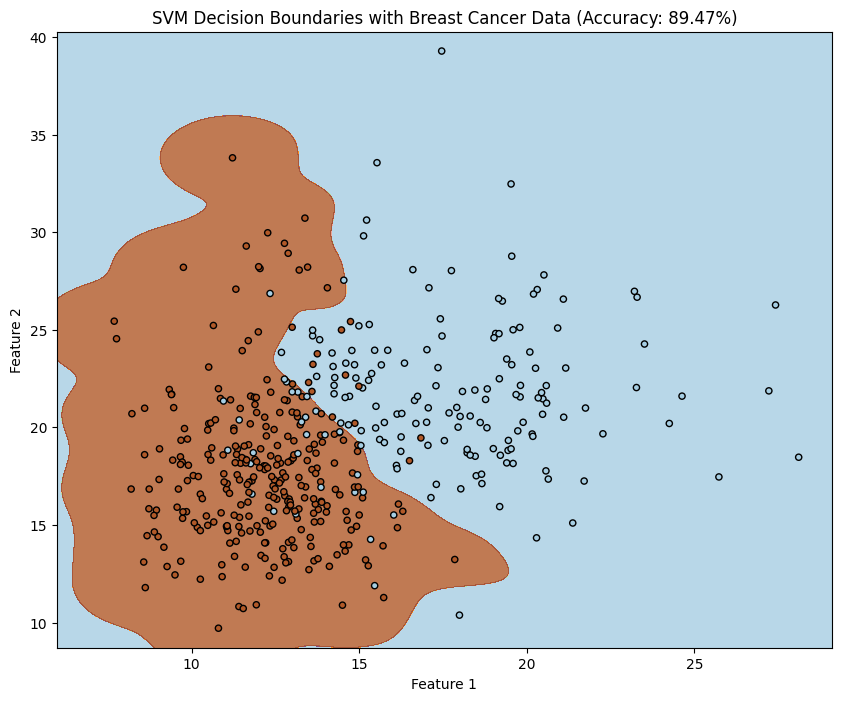

In [55]:
# SUPPORT VECTOR CLASSIFICATION USING INBUILT FUNCTION

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Breast Cancer Wisconsin (Diagnostic) Dataset
cancer = load_breast_cancer()
X = cancer.data[:, :2]  # Considering only the first two features for visualization
y = cancer.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with an rbf kernel
svm_model = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm_model.fit(X_train, y_train)

# Create a meshgrid to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point on the meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Calculate accuracy on the test set
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot the decision boundaries and the points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'SVM Decision Boundaries with Breast Cancer Data (Accuracy: {accuracy * 100:.2f}%)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


Mean Squared Error: 0.009964710047395357


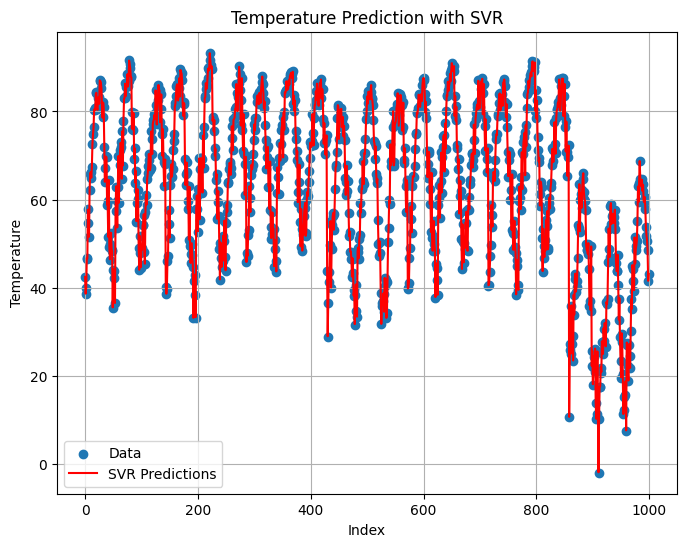

In [54]:
# SUPPORT VECTOR REGRESSION USING INBUILT

# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Import data from dataset
df=pd.read_csv(r"C:\Users\sanan\Downloads\archive (11)\Walmart_Store_sales.csv")

# Generate X as the index of the dataset(first 1000)
X = np.arange(len(df)-5435).reshape(-1, 1)  

# Extract 'Temperature' column as y(first 1000)
y = df['Temperature'][:1000].values

# Fit SVR model
svr = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1)
svr.fit(X, y)

# Make predictions
y_pred = svr.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Plot the data and SVR predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='SVR Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature Prediction with SVR')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
# RANDOM FORREST CLASSIFIER USING BUILT IN FUNCTION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\sanan\Downloads\Cardiovascular_Disease_Dataset.csv")

# Drop rows with missing values
df = df.dropna()

# Select features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.98

Confusion Matrix:
 [[ 81   2]
 [  1 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.98      0.99      0.99       117

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

